The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

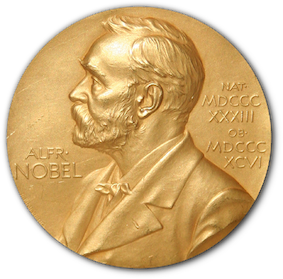

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

# Nobel Prize Winners Analysis (1901-2023)

## Project Overview
This analysis explores patterns in Nobel Prize awards from 1901 to 2023, examining demographics, trends over time, and notable achievements. The dataset contains information about all Nobel Prize winners across six categories: Physics, Chemistry, Medicine, Literature, Peace, and Economics.

## Research Questions
This project addresses five key questions about Nobel Prize patterns:

1. **Demographics**: What is the most commonly awarded gender and birth country?
2. **US Dominance**: Which decade had the highest ratio of US-born Nobel Prize winners?
3. **Gender Representation**: Which decade and category combination had the highest proportion of female laureates?
4. **Historical Firsts**: Who was the first woman to receive a Nobel Prize, and in what category?
5. **Multiple Winners**: Which individuals or organizations have won more than one Nobel Prize?

## Methodology
- Data cleaning and exploration using pandas
- Statistical analysis and visualization with matplotlib and seaborn
- Time series analysis by decade
- Demographic breakdowns by gender and nationality

In [1]:
# Import required libraries for data analysis and visualization
import pandas as pd          # Data manipulation and analysis
import seaborn as sns        # Statistical data visualization
import numpy as np           # Numerical computing
import matplotlib.pyplot as plt  # Plotting library

# Set visualization style for better-looking plots
plt.style.use('default')
sns.set_palette('husl')

In [2]:
# Loading the Nobel Prize dataset
df = pd.read_csv("C:/Users/NN6ZZN4222/OneDrive - PT Pertamina (Persero)/Working Folder/Master in Sweden/Python/Datacamp Project/Visualizing the History of Nobel Prize Winners/data/raw/nobel.csv")
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [3]:
df.shape

(1000, 18)

## Question 1: Demographics Analysis
### What is the most commonly awarded gender and birth country?

This analysis examines the demographic composition of Nobel Prize winners to understand historical patterns in gender and nationality representation.

In [4]:
gender_count = df['sex'].value_counts()
print(gender_count)

sex
Male      905
Female     65
Name: count, dtype: int64


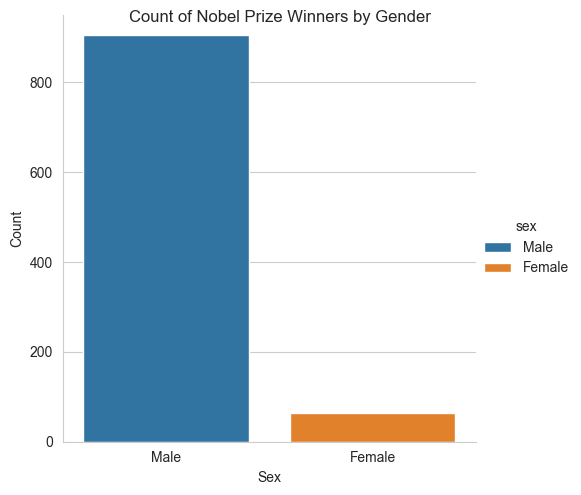

In [5]:
sns.set_style("whitegrid")
g = sns.catplot(data=df, kind="count", x="sex", hue="sex")
g.set_axis_labels("Sex", "Count")
g.fig.suptitle("Count of Nobel Prize Winners by Gender")
plt.show()

In [6]:
top_gender = gender_count.idxmax()
print(top_gender)

Male


In [7]:
country_count = df['birth_country'].value_counts()
print(country_count.head())

birth_country
United States of America    291
United Kingdom               91
Germany                      67
France                       58
Sweden                       30
Name: count, dtype: int64


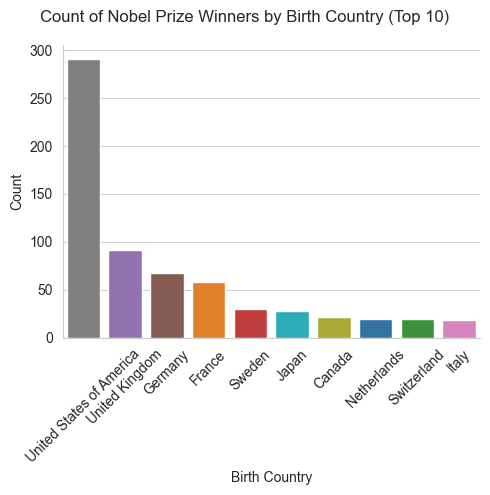

In [8]:
sns.set_style("whitegrid")
# Get top 10 birth countries for better visualization
top_countries = df['birth_country'].value_counts().head(10).index
df_top = df[df['birth_country'].isin(top_countries)]
g = sns.catplot(data=df_top, kind="count", x="birth_country", order=top_countries, hue="birth_country")
g.set_axis_labels("Birth Country", "Count")
g.fig.suptitle("Count of Nobel Prize Winners by Birth Country (Top 10)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
top_country = country_count.idxmax()
print(top_country)

United States of America


2. Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?
   Store this as an integer called max_decade_usa.

In [10]:
# Create decade column
df['decade'] = (df['year'] // 10) * 10

# Calculate ratio of US-born winners by decade
decade_stats = df.groupby('decade').agg({
    'birth_country': ['count', lambda x: (x == 'United States of America').sum()]
}).round(4)

decade_stats.columns = ['total_winners', 'us_winners']
decade_stats['us_ratio'] = decade_stats['us_winners'] / decade_stats['total_winners']

max_decade_usa = int(decade_stats['us_ratio'].idxmax())
print(max_decade_usa)

2000


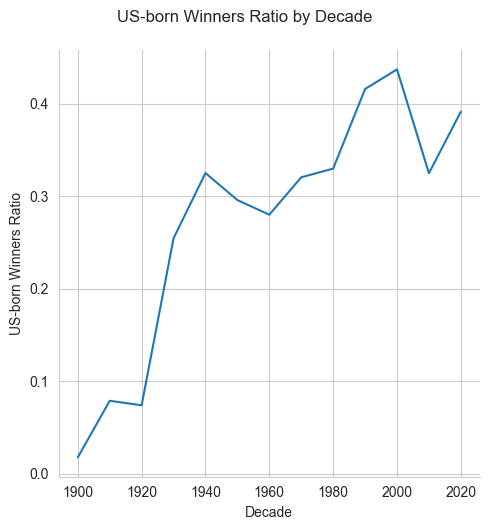

In [11]:
decade_stats = decade_stats.sort_index()

g = sns.relplot(data=decade_stats, x=decade_stats.index, y='us_ratio', kind="line")
g.set_axis_labels("Decade", "US-born Winners Ratio")
g.fig.suptitle("US-born Winners Ratio by Decade", y=1.05)
plt.show()


3. Which decade and Nobel Prize category combination had the highest proportion of female laureates?
   Store this as a dictionary called max_female_dict where the decade is the key and the category is the value. There should only be one key:value pair.

In [22]:
# Calculate female proportion by decade and category
female_stats = df.groupby(['decade', 'category']).agg({
    'sex': ['count', lambda x: (x == 'Female').sum()]
}).round(4)

female_stats.columns = ['total_winners', 'female_winners']
female_stats['female_proportion'] = female_stats['female_winners'] / female_stats['total_winners']

# Filter out combinations with very few winners (less than 3) to avoid misleading ratios
female_stats_filtered = female_stats[female_stats['total_winners'] >= 3]

# Get the index (decade, category) with maximum female proportion
max_female_idx = female_stats_filtered['female_proportion'].idxmax()

# Create dictionary with the top female proportion results
max_female_dict = {
    'decade': max_female_idx[0],  # First element of the tuple index
    'category': max_female_idx[1],  # Second element of the tuple index
    'female_proportion': female_stats_filtered.loc[max_female_idx, 'female_proportion']
}

print("Maximum female proportion combination:")
print(f"Decade: {max_female_dict['decade']}")
print(f"Category: {max_female_dict['category']}")
print(f"Female proportion: {max_female_dict['female_proportion']}")

Maximum female proportion combination:
Decade: 2010
Category: Peace
Female proportion: 0.5


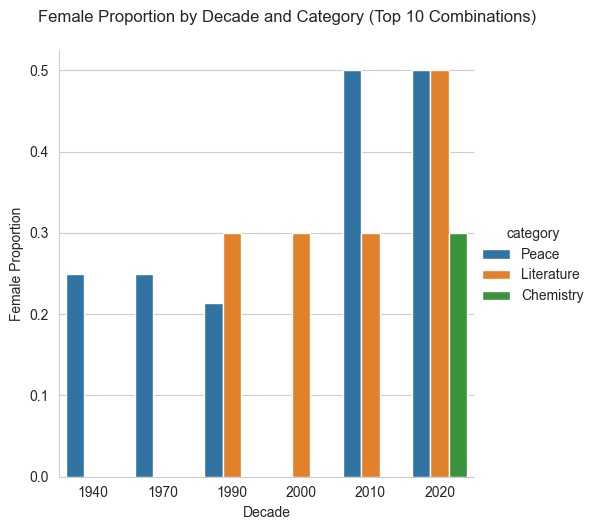

In [13]:
g = sns.catplot(data=top_female, x='decade', y='female_proportion', hue='category', kind="bar")
g.set_axis_labels("Decade", "Female Proportion")
g.fig.suptitle("Female Proportion by Decade and Category (Top 10 Combinations)", y=1.05)
plt.show()

4. Who was the first woman to receive a Nobel Prize, and in what category?
   Save your string answers as first_woman_name and first_woman_category.

In [14]:
# Filter for female winners and sort by year
female_winners = df[df['sex'] == 'Female'].sort_values('year')

# Get the first woman
first_woman = female_winners.iloc[0]
first_woman_name = first_woman['full_name']
first_woman_category = first_woman['category']

print(f"First woman Nobel Prize winner: {first_woman_name}")
print(f"Category: {first_woman_category}")
print(f"Year: {first_woman['year']}")

First woman Nobel Prize winner: Marie Curie, née Sklodowska
Category: Physics
Year: 1903


5. Which individuals or organizations have won more than one Nobel Prize throughout the years?
   Store the full names in a list named repeat_list.

In [15]:
# Count prizes by full name
prize_counts = df['full_name'].value_counts()

# Filter for those with more than one prize
multiple_winners = prize_counts[prize_counts > 1]

print("Multiple Nobel Prize winners:")
for name, count in multiple_winners.items():
    print(f"{name}: {count} prizes")
    # Show details for each winner
    winner_details = df[df['full_name'] == name][['year', 'category', 'laureate_type']]
    print(winner_details)
    print()

# Create the list of repeat winners
repeat_list = multiple_winners.index.tolist()

print(f"\nAnswer: List of repeat winners:")
print(repeat_list)
print(f"\nTotal number of repeat winners: {len(repeat_list)}")

Multiple Nobel Prize winners:
Comité international de la Croix Rouge (International Committee of the Red Cross): 3 prizes
     year category laureate_type
89   1917    Peace  Organization
215  1944    Peace  Organization
348  1963    Peace  Organization

Frederick Sanger: 2 prizes
     year   category laureate_type
306  1958  Chemistry    Individual
505  1980  Chemistry    Individual

Marie Curie, née Sklodowska: 2 prizes
    year   category laureate_type
19  1903    Physics    Individual
62  1911  Chemistry    Individual

Office of the United Nations High Commissioner for Refugees (UNHCR): 2 prizes
     year category laureate_type
283  1954    Peace  Organization
523  1981    Peace  Organization

John Bardeen: 2 prizes
     year category laureate_type
298  1956  Physics    Individual
424  1972  Physics    Individual

Linus Carl Pauling: 2 prizes
     year   category laureate_type
278  1954  Chemistry    Individual
340  1962      Peace    Individual


Answer: List of repeat winners:
['

In [16]:
# Final Summary: All answers stored in variables as requested
print("=== FINAL ANSWERS ===")
print(f"1. Most common gender: {top_gender}")
print(f"1. Most common birth country: {top_country}")
print(f"2. Decade with highest US ratio: {max_decade_usa}")
print(f"3. Decade-category with highest female proportion: {max_female_dict}")
print(f"4. First woman Nobel Prize winner: {first_woman_name}")
print(f"4. First woman's category: {first_woman_category}")
print(f"5. Repeat winners list: {repeat_list}")

# Verify all variables are properly defined
print("\n=== Variable Types ===")
print(f"top_gender type: {type(top_gender)}")
print(f"top_country type: {type(top_country)}")
print(f"max_decade_usa type: {type(max_decade_usa)}")
print(f"max_female_dict type: {type(max_female_dict)}")
print(f"first_woman_name type: {type(first_woman_name)}")
print(f"first_woman_category type: {type(first_woman_category)}")
print(f"repeat_list type: {type(repeat_list)}")

=== FINAL ANSWERS ===
1. Most common gender: Male
1. Most common birth country: United States of America
2. Decade with highest US ratio: 2000
3. Decade-category with highest female proportion: {np.int64(2010): 'Peace'}
4. First woman Nobel Prize winner: Marie Curie, née Sklodowska
4. First woman's category: Physics
5. Repeat winners list: ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)', 'John Bardeen', 'Linus Carl Pauling']

=== Variable Types ===
top_gender type: <class 'str'>
top_country type: <class 'str'>
max_decade_usa type: <class 'int'>
max_female_dict type: <class 'dict'>
first_woman_name type: <class 'str'>
first_woman_category type: <class 'str'>
repeat_list type: <class 'list'>
